### Homework 2 - CNN CIFAR 10 
https://www.tensorflow.org/alpha/tutorials/images/intro_to_cnns

In [1]:
import numpy as np
import pandas as pd

#### Loading Dataset

In [2]:
import os
location =  r"E:\Data\CIFAR10\Original\Train"
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
train = [ r"{}\{}".format(location,i) for i in files]

location = r"E:\Data\CIFAR10\Original"
file = "Train_Label.csv"
train_labels = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values

train[:10]

['E:\\Data\\CIFAR10\\Original\\Train\\0.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\1.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\2.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\3.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\4.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\5.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\6.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\7.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\8.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\9.jpeg']

In [3]:
%pylab inline
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

table = [[] for _ in range(10)]
for i in range(len(train)):
    label = train_labels[i, 0]
    table[label].append(i)

Populating the interactive namespace from numpy and matplotlib


C:\Users\ken\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


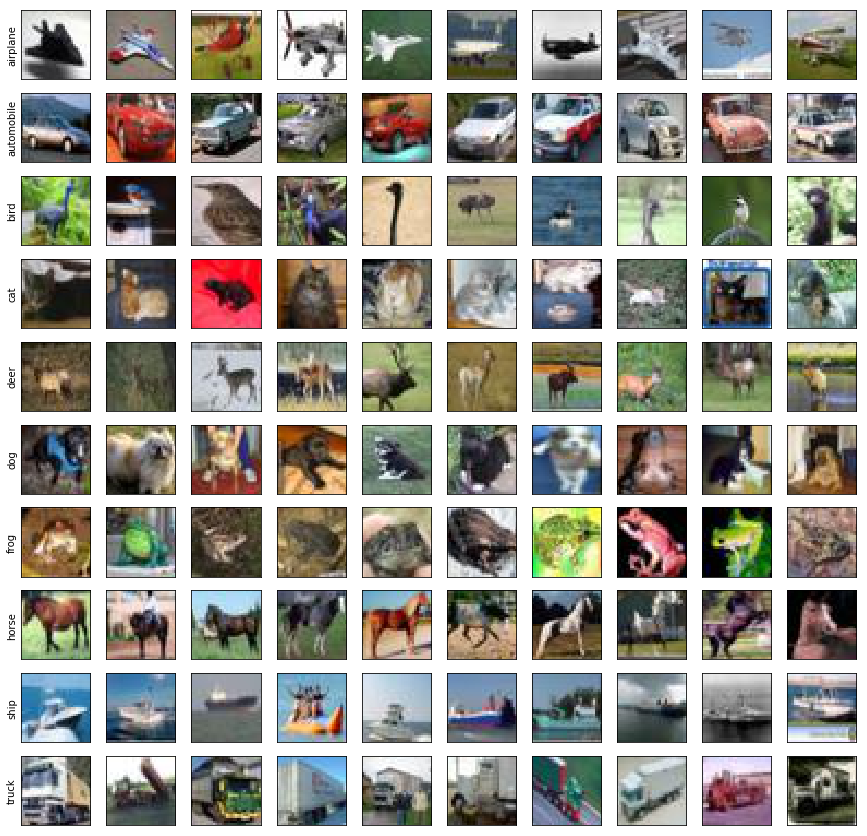

In [4]:
plt.figure(figsize=(15,15))
for class_index in range(10):
    for example_index in range(10):
        plt.subplot(10, 10, class_index * 10 + example_index + 1)
        plt.xticks([])
        plt.yticks([])
        if example_index == 0:
            plt.ylabel(class_names[class_index], rotation=90)
        plt.grid(False)
        plt.imshow(imread(train[table[class_index][example_index]]))
plt.show()

In [5]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np

class CIFAR10Sequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return np.array([
                   imread(file_name)
               for file_name in batch_x])/255, np.array(batch_y)

In [11]:
from sklearn.model_selection import train_test_split
import random

train, validation, train_labels, validation_labels = train_test_split(train, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))

batch_size = 100
train_seq = CIFAR10Sequence(train, train_labels, batch_size)
validation_seq = CIFAR10Sequence(validation, validation_labels, batch_size)

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks

def baselineModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    #Dense Layers and output
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [13]:
model = baselineModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [14]:
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience = 5,
        verbose=1)]

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('./checkpoints/my_checkpoint')
model.fit_generator(train_seq, validation_data=validation_seq, epochs=100, callbacks=callback)

model.save_weights("./checkpoints/my_checkpoint")

Epoch 1/100
256/256 [==============================] - 14s 55ms/step - loss: 1.7759 - accuracy: 0.3465 - val_loss: 1.5285 - val_accuracy: 0.4255
Epoch 2/100
256/256 [==============================] - 12s 46ms/step - loss: 1.4351 - accuracy: 0.4796 - val_loss: 1.4003 - val_accuracy: 0.4945
Epoch 3/100
256/256 [==============================] - 11s 45ms/step - loss: 1.2911 - accuracy: 0.5399 - val_loss: 1.2749 - val_accuracy: 0.5462
Epoch 4/100
256/256 [==============================] - 11s 44ms/step - loss: 1.1946 - accuracy: 0.5753 - val_loss: 1.2322 - val_accuracy: 0.5627
Epoch 5/100
256/256 [==============================] - 12s 45ms/step - loss: 1.1188 - accuracy: 0.6084 - val_loss: 1.1990 - val_accuracy: 0.5778
Epoch 6/100
256/256 [==============================] - 12s 45ms/step - loss: 1.0502 - accuracy: 0.6309 - val_loss: 1.1338 - val_accuracy: 0.6062
Epoch 7/100
256/256 [==============================] - 12s 45ms/step - loss: 0.9982 - accuracy: 0.6479 - val_loss: 1.0978 - val_ac

Model stopped learning at 65% validation accuracy. Overfitted on training by a lot

#### Image Augmentation and Transfer Learning on mobilenetv2

https://www.reddit.com/r/MachineLearning/comments/axq6lu/p_albumentations_an_image_augmentation_library/
https://github.com/albu/albumentations/blob/master/notebooks/example.ipynb

pip install -U albumentations

In [121]:
from urllib.request import urlopen
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    Transpose, ShiftScaleRotate, Resize, RandomSizedCrop, RandomCrop, Rotate
)

In [17]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()
    
def augment(aug, image):
    image = aug(image=image)['image']
    return image

Example Image Augmentations

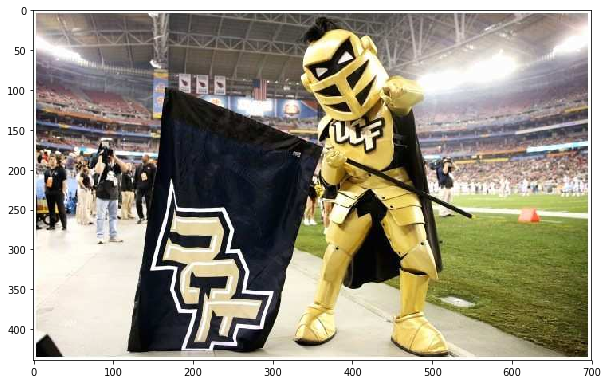

In [30]:
image = download_image('https://therunnersports.com/wp-content/uploads/2019/02/univ-of-central-florida-football-admirable-ucf-knights-of-univ-of-central-florida-football.jpg')
show_image(image)

In [ ]:
#p (float) – probability of applying the transform. Default: 0.5.
aug = ShiftScaleRotate(rotate_limit=0, scale_limit=0 ,p= 1)
a = augment(aug,image)
show_image(a) 

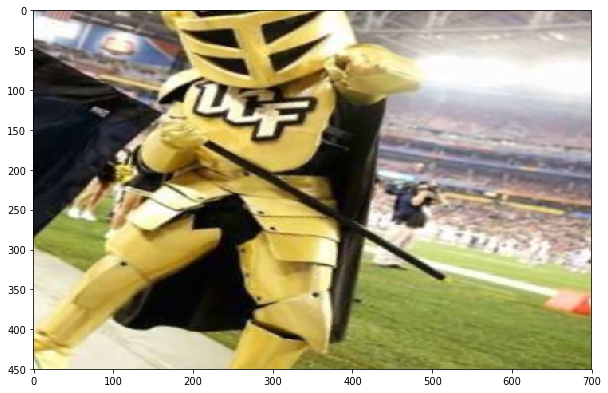

In [74]:
#p (float) – probability of applying the transform. Default: 0.5.
aug = RandomSizedCrop(min_max_height=(300,400), height=450, width=700,p= 1)
show_image(augment(aug,a)) 

In [137]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np

class CIFAR10AugmentationAndResize(tf.keras.utils.Sequence):
    #Default size is 96 because it is one of the default train image size of mobilenetv2
    def __init__(self, x_set, y_set, batch_size, 
                 augmentations = True,
                 height = 96, width = 96,
                 pShiftScaleRotate = .2, pRandomSizedCrop = .2):
        
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.pShiftScaleRotate = pShiftScaleRotate
        self.pRandomSizedCrop = pRandomSizedCrop      
        self.height = height
        self.width = width
        self.augmentations = augmentations

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        images = [imread(file_name) for file_name in batch_x]
        
        resize = Resize(height=self.height, width=self.width)
        rotate = Rotate()
        #shiftScaleRotate = ShiftScaleRotate(p=self.pShiftScaleRotate)
        randomSizedCrop = RandomSizedCrop(min_max_height=(self.height - self.height * .25 ,self.height), height=self.height, width=self.width, p=self.pRandomSizedCrop)
        horizontalFlip = HorizontalFlip()
        
        for i in range(len(images)):    
            images[i] = augment(resize ,images[i])
            
            if(self.augmentations):
                images[i] = augment(rotate ,images[i])
                images[i] = augment(horizontalFlip ,images[i])
                images[i] = augment(randomSizedCrop ,images[i])
        
        return np.array(images)/255, np.array(batch_y)

In [138]:
import os
location =  r"E:\Data\CIFAR10\Original\Train"
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
train = [ r"{}\{}".format(location,i) for i in files]

location = r"E:\Data\CIFAR10\Original"
file = "Train_Label.csv"
train_labels = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values

In [139]:
from sklearn.model_selection import train_test_split
import random

train, validation, train_labels, validation_labels = train_test_split(train, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))

batch_size = 32
train_seq = CIFAR10AugmentationAndResize(train, train_labels, batch_size)
validation_seq = CIFAR10AugmentationAndResize(validation, validation_labels, batch_size, augmentations=False)

Populating the interactive namespace from numpy and matplotlib
horse


C:\Users\ken\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['resize', 'random', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


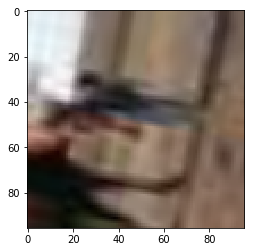

In [140]:
%pylab inline
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

example, example_label = train_seq.__getitem__(0)
plt.imshow(example[0])
print(class_names[example_label[0,0]])

bird


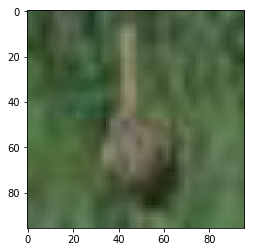

In [141]:
example, example_label = validation_seq.__getitem__(0)
plt.imshow(example[0])
print(class_names[example_label[0,0]])

#### Transfer Learning - feature extraction
Tutorial https://www.tensorflow.org/alpha/tutorials/images/transfer_learning

Mobile Net v2 https://arxiv.org/pdf/1801.04381.pdf

In [192]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import tensorflow.keras as keras

In [198]:
IMG_SIZE = 96
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                   include_top=False, 
                                                   weights='imagenet')
base_model.trainable = False
    
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer =  models.Sequential()
prediction_layer.add(layers.Dense(256, activation='relu'))
prediction_layer.add(layers.Dropout(.2))
prediction_layer.add(layers.Dense(10, activation='softmax'))

model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [199]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_17  (None, 1280)              0         
_________________________________________________________________
sequential_35 (Sequential)   (None, 10)                330506    
Total params: 2,588,490
Trainable params: 330,506
Non-trainable params: 2,257,984
_________________________________________________________________


In [200]:
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience = 5,
        verbose=1)]

#model.load_weights('./checkpoints/my_checkpoint')
history = model.fit_generator(train_seq, validation_data=validation_seq, epochs=30, shuffle=True, callbacks=callback)

model.save_weights("./checkpoints/my_checkpoint")

Epoch 1/30
1250/1250 [==============================] - 51s 41ms/step - loss: 1.6822 - accuracy: 0.4162 - val_loss: 1.6942 - val_accuracy: 0.4149
Epoch 2/30
1250/1250 [==============================] - 41s 33ms/step - loss: 1.4087 - accuracy: 0.5153 - val_loss: 1.2089 - val_accuracy: 0.5891
Epoch 3/30
1250/1250 [==============================] - 43s 34ms/step - loss: 1.3486 - accuracy: 0.5355 - val_loss: 1.0706 - val_accuracy: 0.6348
Epoch 4/30
1250/1250 [==============================] - 41s 33ms/step - loss: 1.2998 - accuracy: 0.5506 - val_loss: 0.9888 - val_accuracy: 0.6562
Epoch 5/30
1250/1250 [==============================] - 43s 34ms/step - loss: 1.2818 - accuracy: 0.5576 - val_loss: 0.9755 - val_accuracy: 0.6594
Epoch 6/30
1250/1250 [==============================] - 42s 34ms/step - loss: 1.2574 - accuracy: 0.5669 - val_loss: 0.9633 - val_accuracy: 0.6655
Epoch 7/30
1250/1250 [==============================] - 42s 34ms/step - loss: 1.2503 - accuracy: 0.5672 - val_loss: 0.9483 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

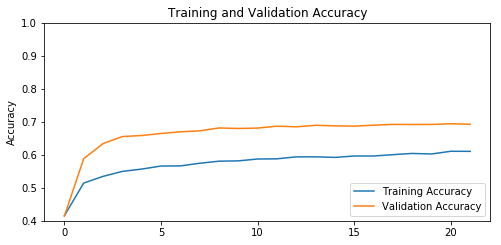

In [201]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

### Fine tuning

In [202]:
base_model.trainable = True

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

model.compile(loss='sparse_categorical_crossentropy',
            optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
            metrics=['accuracy'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_17  (None, 1280)              0         
_________________________________________________________________
sequential_35 (Sequential)   (None, 10)                330506    
Total params: 2,588,490
Trainable params: 2,193,098
Non-trainable params: 395,392
_________________________________________________________________


In [203]:
history_fine = model.fit_generator(train_seq, validation_data=validation_seq, epochs=30, shuffle=True)

model.save_weights("./checkpoints/my_checkpoint1")

Epoch 1/30
1250/1250 [==============================] - 198s 159ms/step - loss: 1.0858 - accuracy: 0.6248 - val_loss: 0.8275 - val_accuracy: 0.7157
Epoch 2/30
1250/1250 [==============================] - 53s 42ms/step - loss: 1.0178 - accuracy: 0.6475 - val_loss: 0.7943 - val_accuracy: 0.7303
Epoch 3/30
1250/1250 [==============================] - 54s 43ms/step - loss: 0.9769 - accuracy: 0.6608 - val_loss: 0.7617 - val_accuracy: 0.7393
Epoch 4/30
1250/1250 [==============================] - 57s 46ms/step - loss: 0.9354 - accuracy: 0.6759 - val_loss: 0.7415 - val_accuracy: 0.7485
Epoch 5/30
1250/1250 [==============================] - 54s 43ms/step - loss: 0.9047 - accuracy: 0.6879 - val_loss: 0.7260 - val_accuracy: 0.7546
Epoch 6/30
1250/1250 [==============================] - 54s 43ms/step - loss: 0.8754 - accuracy: 0.6951 - val_loss: 0.7092 - val_accuracy: 0.7614
Epoch 7/30
1250/1250 [==============================] - 54s 44ms/step - loss: 0.8587 - accuracy: 0.7033 - val_loss: 0.6927

Text(0.5, 1.0, 'Training and Validation Accuracy')

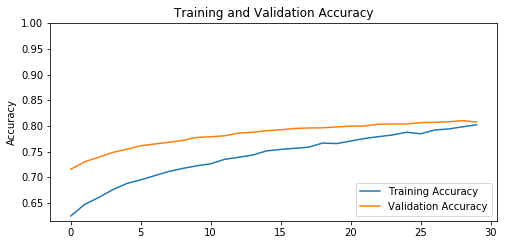

In [204]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

Evaluate final model on test set

In [205]:
import os
location =  r"E:\Data\CIFAR10\Original\Test"
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
test = [ r"{}\{}".format(location,i) for i in files]

location = r"E:\Data\CIFAR10\Original"
file = "Test_Label.csv"
test_labels = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values

In [206]:
from sklearn.model_selection import train_test_split
import random

batch_size = 32
test_seq = CIFAR10AugmentationAndResize(test, test_labels, batch_size, augmentations=False)

In [207]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_17  (None, 1280)              0         
_________________________________________________________________
sequential_35 (Sequential)   (None, 10)                330506    
Total params: 2,588,490
Trainable params: 2,193,098
Non-trainable params: 395,392
_________________________________________________________________


In [208]:
model.load_weights("./checkpoints/my_checkpoint1")

In [209]:
model.evaluate_generator(test_seq)

[0.6201749800112301, 0.8099]

### Test accuracy 80.99%